<a href="https://colab.research.google.com/github/julianovale/BB_Evolution/blob/main/0025_AluraBB_Geopandas01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install geopandas

In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
! wget https://caelum-online-public.s3.amazonaws.com/985-geopandas/01/Mapas.zip
! unzip Mapas.zip

--2021-07-12 12:10:38--  https://caelum-online-public.s3.amazonaws.com/985-geopandas/01/Mapas.zip
Resolving caelum-online-public.s3.amazonaws.com (caelum-online-public.s3.amazonaws.com)... 52.216.139.35
Connecting to caelum-online-public.s3.amazonaws.com (caelum-online-public.s3.amazonaws.com)|52.216.139.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2200604 (2.1M) [application/octet-stream]
Saving to: ‘Mapas.zip.1’

Mapas.zip.1         100%[===================>]   2.10M  --.-KB/s    in 0.1s    

2021-07-12 12:10:39 (14.6 MB/s) - ‘Mapas.zip.1’ saved [2200604/2200604]

Archive:  Mapas.zip
replace Mapas/RJ/33MUE250GC_SIR.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
rj = gpd.read_file('/content/Mapas/RJ/33MUE250GC_SIR.shp')
type(rj)

geopandas.geodataframe.GeoDataFrame

In [ ]:
  rj.head()

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."


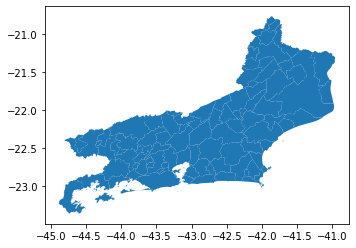

In [ ]:
rj.plot()

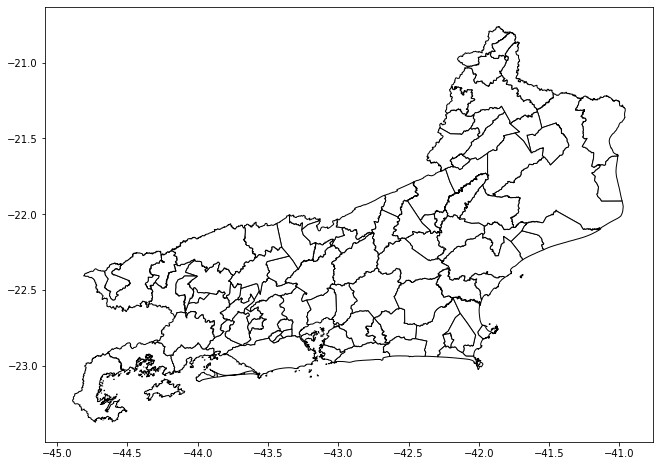

In [ ]:
rj.plot(color='white', edgecolor='black', figsize=(15,8))

In [ ]:
from shapely.geometry import Polygon, Point, LineString, MultiPolygon

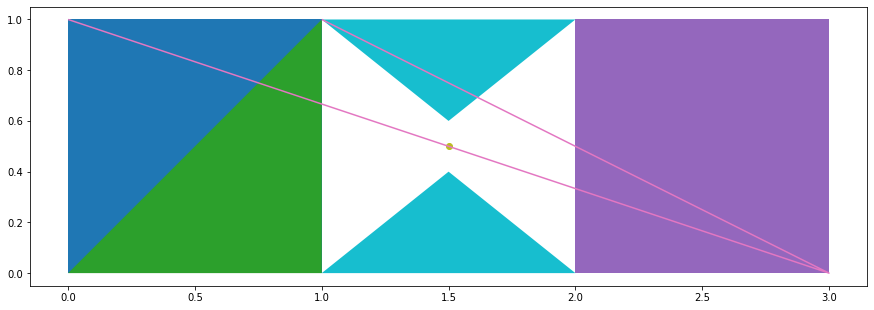

In [ ]:
p1 = Polygon([(0,0),(1,0),(1,1),(0,1)])
p2 = Polygon([(0,0),(1,0),(1,1)])
p3 = Polygon([(2,0),(3,0),(3,1),(2,1)])
p4 = LineString([(0,1),(3,0),(1,1)])
p5 = Point(1.5,0.5)
p6 = Polygon([(1,0),(1.5,0.4),(2,0)])
p7 = Polygon([(1,1),(1.5,0.6),(2,1)])
p8 = MultiPolygon([p6, p7])
g = gpd.GeoSeries([p1,p2,p3,p4,p5,p8])
g.plot(cmap='tab10', figsize=(15,8))

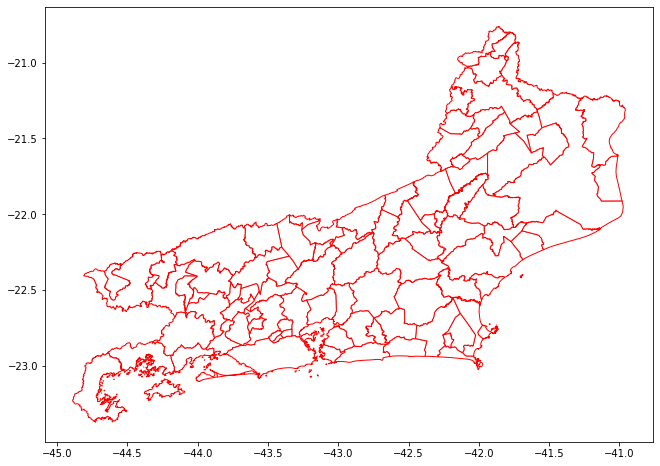

In [ ]:
rj.plot(color='white', edgecolor='red', figsize=(15,8))

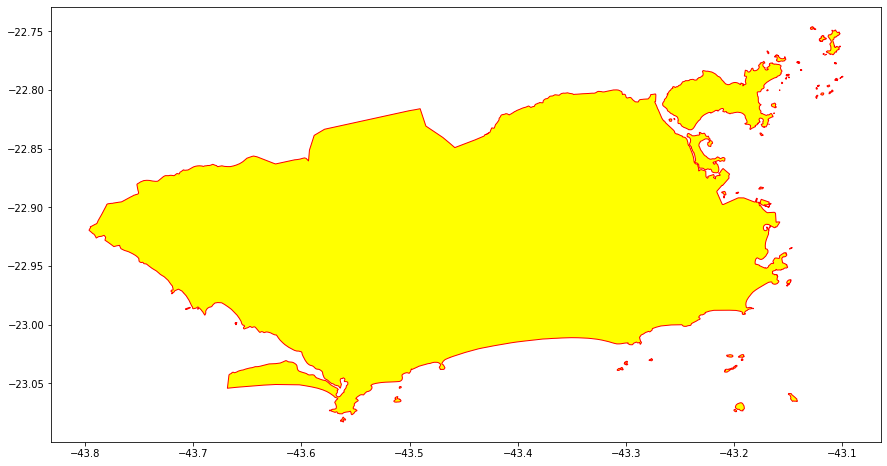

In [ ]:
rj_mun = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO']
rj_mun.plot(color='yellow', edgecolor='red', figsize=(15,8))

In [ ]:
rj_mun

,ID,CD_GEOCODM,NM_MUNICIP,geometry
67,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


In [ ]:
import os
dir = '/content/Mapas/RJ_Munic'
if not os.path.exists(dir):
  os.makedirs(dir)

In [ ]:
rj_mun.to_file(dir + '/RJ_Munic.shp')

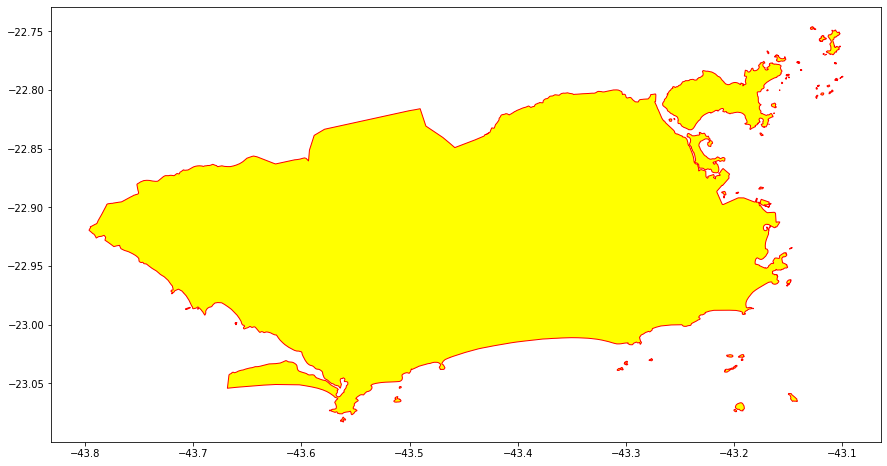

In [ ]:
rj_mun = gpd.read_file('/content/Mapas/RJ_Munic/RJ_Munic.shp')
rj_mun.plot(color='yellow', edgecolor='red', figsize=(15,8))

In [ ]:
rj_mun

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


In [ ]:
texto = 'https://raw.githubusercontent.com/julianovale/BB_Evolution/main/Arquivos/dados.txt'
dados = pd.read_table(texto)

# x = longitude e y = latitude
# zip = gera tuplas

x = zip(dados.Longitude, dados.Latitude)
list(x)

[(-43.4629464, -23.0164552),
 (-43.3369111, -22.9431995),
 (-43.300517, -22.873849),
 (-43.4127033, -22.9847874),
 (-51.92528, -14.235004),
 (-43.477504700000004, -23.0189271),
 (-43.247108700000005, -22.933574899999996),
 (-43.192534, -22.9823004),
 (-51.92528, -14.235004),
 (-43.175411, -22.9364023),
 (-43.262945, -22.918533),
 (-49.0606445, -26.922570899999997),
 (-43.303056, -23.013213),
 (-43.1698189, -22.952982000000002),
 (-43.1849587, -22.970644399999998),
 (-43.354812100000004, -23.0097423),
 (-49.0606445, -26.922570899999997),
 (-43.3461644, -22.938107000000002),
 (-43.181953799999995, -22.9497255),
 (-43.2327966, -22.9218818),
 (-43.3939698, -22.9995191),
 (-43.280851500000004, -22.9055097),
 (-43.1875152, -22.934498),
 (-43.5016663, -23.019108300000003),
 (-43.45904960000001, -23.023215),
 (-43.233903399999996, -22.9936095),
 (-43.1987716, -22.985367999999998),
 (-43.230810600000005, -22.9771863),
 (-43.2525968, -22.926766600000004),
 (-51.92528, -14.235004),
 (-43.18529320

In [ ]:
geometry = [Point(x) for x in zip(dados.Longitude, dados.Latitude)]

In [ ]:
crs = {'proj' : 'latlong',
       'ellps' : 'WGS84',
       'datum' : 'WGS84',
       'no_defs' : True}

geo_dados = gpd.GeoDataFrame(dados, crs = crs, geometry = geometry)

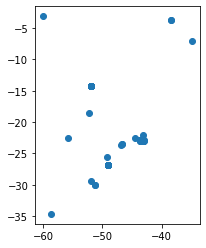

In [ ]:
geo_dados.plot()

In [ ]:
import os
dir = '/content/Mapas/RJ_DATASET'
if not os.path.exists(dir):
  os.makedirs(dir)

In [ ]:
geo_dados.to_file(dir + '/DATASET.shp')

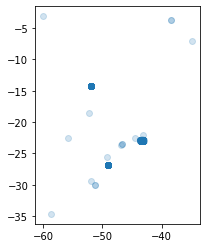

In [ ]:
geo_dados.plot(alpha = 0.2)

In [ ]:
rj = gpd.read_file('/content/Mapas/RJ_Munic/RJ_Munic.shp')
geo_dados = gpd.read_file('/content/Mapas/RJ_DATASET/DATASET.shp')

In [ ]:
# para ver o CRS - Coordinate Reference System


rj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
geo_dados.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Para afinar os sistemas de referencias:

sites: https://www.spatialreference.org/

https://www.lapig.iesa.ufg.br/lapig/cursos_online/gvsig/a_projeo_utm_no_brasil.html

Entrar em EPSG e procurar o SIRGAS2000, escolher o melhor sistema/fuso. Rio de Janeiro: EPSG:31983: SIRGAS 2000 / UTM zone 23S para coordenadas UTM (metros ou quilômetros).

Entrar e escolher: "Proj4". 

É só copiar: "+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"

Toquei o "m" de units para "km".

In [ ]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [ ]:
rj.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [ ]:
geo_dados.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [ ]:
# para gravar a atualização do CRS

rj.to_file('/content/Mapas/RJ_Munic/RJ_Munic.shp')
geo_dados.to_file('/content/Mapas/RJ_DATASET/DATASET.shp')

In [ ]:
rj = gpd.read_file('/content/Mapas/RJ_Munic/RJ_Munic.shp')
geo_dados = gpd.read_file('/content/Mapas/RJ_DATASET/DATASET.shp')

In [ ]:
rj.crs

<Projected CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unk ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (kilometre)
- [north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_Unknown_based_on_GRS80_ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
geo_dados.crs

<Projected CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unk ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (kilometre)
- [north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_Unknown_based_on_GRS80_ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((692.576 7476.609, 692.572 7476..."


In [ ]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-248.715 8415.117)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417)


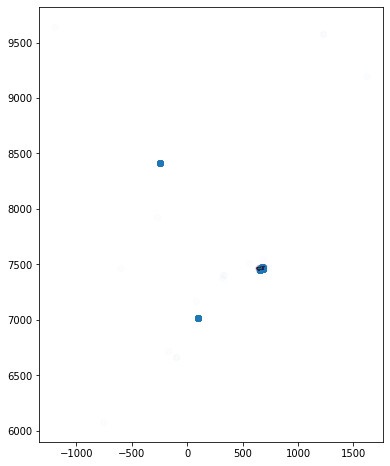

In [ ]:
base = rj.plot(color='yellow', edgecolor='red', figsize=(15,8))
geo_dados.plot(ax=base, figsize=(15,8), alpha=0.01) # o alpha deixa transparente. Tem muitos pontos fora da base...

In [ ]:
rj.iloc[0]

ID                                                         1535
CD_GEOCODM                                              3304557
NM_MUNICIP                                       RIO DE JANEIRO
geometry      (POLYGON ((692.5758012880638 7476.609203982483...
Name: 0, dtype: object

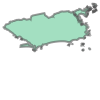

In [ ]:
# preciso eliminar os dados fora do município do RJ

rj.iloc[0].geometry

In [ ]:
geo_dados.iloc[0]

Area                                                 138
Bairro                          Recreio dos Bandeirantes
Cidade                                    Rio de Janeiro
Endereco                             Rua Vicente Scofano
Estado                                                RJ
Latitude                                        -23.0165
Longitude                                       -43.4629
Quartos                                                3
Suites                                                 1
Vagas                                                  3
Tipo                                         Apartamento
Transacao                                          Venda
Valor                                            1095000
geometry     POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

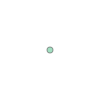

In [ ]:
geo_dados.iloc[0].geometry

In [ ]:
# perguntar se o ponto está dentro da geometria do RJ:

geo_dados.iloc[0].geometry.within(rj.iloc[0].geometry)

True

In [ ]:
# se eu quiser fazer para todos os pontos

geo_dados['geometry'].within(rj.iloc[0].geometry)

0        True
1        True
2        True
3        True
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

In [ ]:
antes = geo_dados.shape[0]

In [ ]:
antes

5000

In [ ]:
geo_dados = geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]

In [ ]:
depois = geo_dados.shape[0]

In [ ]:
depois

4513

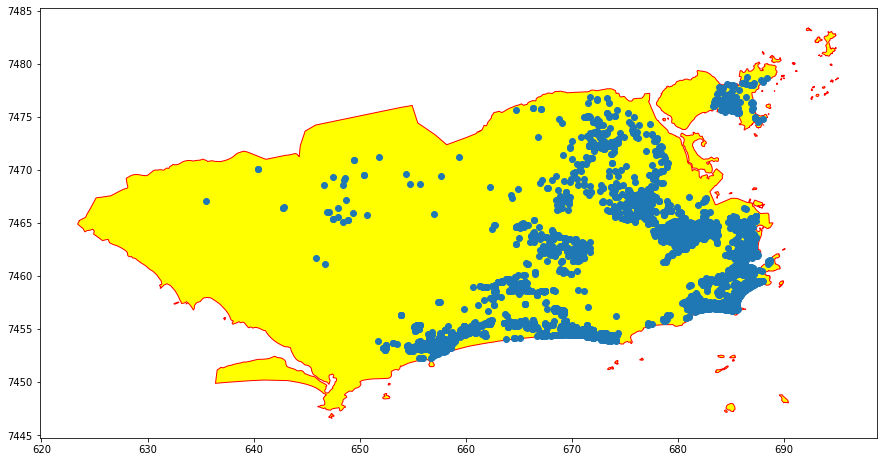

In [ ]:
base = rj.plot(color='yellow', edgecolor='red', figsize=(15,8))
geo_dados.plot(ax=base, figsize=(15,8))

In [ ]:
geo_dados.to_file('/content/Mapas/RJ_DATASET/DATASET.shp')

In [ ]:
geo_dados = gpd.read_file('/content/Mapas/RJ_DATASET/DATASET.shp')

In [ ]:
geo_dados.shape[0]

4513

In [ ]:
! wget https://caelum-online-public.s3.amazonaws.com/985-geopandas/05/Transporte.zip
! unzip Transporte.zip -d '/content/Mapas/RJ_DATASET'

--2021-07-12 12:11:22--  https://caelum-online-public.s3.amazonaws.com/985-geopandas/05/Transporte.zip
Resolving caelum-online-public.s3.amazonaws.com (caelum-online-public.s3.amazonaws.com)... 52.216.200.51
Connecting to caelum-online-public.s3.amazonaws.com (caelum-online-public.s3.amazonaws.com)|52.216.200.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2920 (2.9K) [application/octet-stream]
Saving to: ‘Transporte.zip.1’

Transporte.zip.1    100%[===================>]   2.85K  --.-KB/s    in 0s      

2021-07-12 12:11:23 (140 MB/s) - ‘Transporte.zip.1’ saved [2920/2920]

Archive:  Transporte.zip
replace /content/Mapas/RJ_DATASET/Transporte/Metrô/Estações_Metrô.geojson? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
metro = gpd.read_file('/content/Mapas/RJ_DATASET/Transporte/Metrô/Estações_Metrô.geojson')

In [ ]:
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,Status,Data_Inc,Flg_Linha4,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,None,None,0,1,0,0,None,0,None,0,None,1998,POINT (-43.36485 -22.80662)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (-43.35845 -22.81627)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (-43.34964 -22.82452)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (-43.34326 -22.83148)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (-43.33386 -22.84269)


In [ ]:
metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [ ]:
metro.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [ ]:
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,Status,Data_Inc,Flg_Linha4,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,None,None,0,1,0,0,None,0,None,0,None,1998,POINT (667.827 7476.959)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (668.471 7475.883)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (669.365 7474.959)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (670.012 7474.182)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,None,None,0,0,0,0,None,0,None,0,None,1998,POINT (670.963 7472.930)


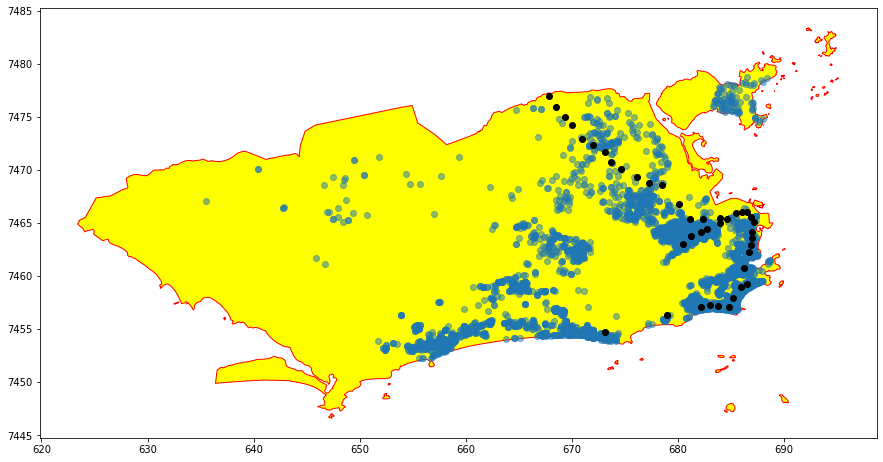

In [ ]:
base = rj.plot(color='yellow', edgecolor='red', figsize=(15,8))
geo_dados.plot(ax=base, alpha=0.5)
metro.plot(ax=base, color='black')

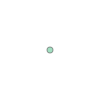

In [ ]:
geo_dados.iloc[0].geometry

In [ ]:
distance = metro.distance(geo_dados.iloc[0].geometry)

In [ ]:
distance

0     25.321516
1     24.623350
2     24.224237
3     23.881158
4     23.357575
5     23.523396
6     23.658163
7     23.401048
8     23.644084
9     24.209373
10    24.795188
11    25.596665
12    26.033173
13    26.295764
14    27.398579
15    28.659654
16    25.773027
17    26.716983
18    27.377518
19    30.455326
20    31.034097
21    31.466395
22    31.662650
23    31.695780
24    31.232661
25    31.026518
26    30.727260
27    30.401336
28    29.515734
29    29.476829
30    28.850631
31    29.407590
32    27.940690
33    28.901631
34    27.475584
35    24.743520
36    26.507063
37    25.728350
38    24.822792
39    21.589055
40    15.622939
dtype: float64

In [ ]:
distance.min()

15.62293882499506

In [ ]:
geo_dados['Dist_Metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())

In [ ]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_Metro
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159


In [ ]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000


In [ ]:
coef = geo_dados['Valor'].corr(geo_dados['Dist_Metro'])

In [ ]:
coef

-0.195640831616868

In [ ]:
geo_dados.to_file('/content/Mapas/RJ_DATASET/DATASET.shp')
geo_dados = gpd.read_file('/content/Mapas/RJ_DATASET/DATASET.shp')
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,POINT (662.701 7457.284)
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,POINT (656.019 7453.574)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,20.667831,POINT (648.664 7469.216)
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,18.189134,POINT (655.010 7452.944)
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,2.180300,POINT (683.909 7459.848)
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,2.558248,POINT (678.393 7464.417)


In [ ]:
geo_dados['Estacao_Idx'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).idxmin())

In [ ]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,geometry,Estacao_Idx
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,POINT (657.514 7453.832),40
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,POINT (670.524 7461.803),40
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,POINT (674.345 7469.440),8
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,POINT (662.701 7457.284),40
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,POINT (656.019 7453.574),40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,20.667831,POINT (648.664 7469.216),0
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,18.189134,POINT (655.010 7452.944),40
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,2.180300,POINT (683.909 7459.848),30
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,2.558248,POINT (678.393 7464.417),35


In [ ]:
geo_dados['Estacao'] = geo_dados.Estacao_Idx.map(metro.Nome)

In [ ]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,geometry,Estacao_Idx,Estacao
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,POINT (657.514 7453.832),40,Jardim Oceânico
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,POINT (670.524 7461.803),40,Jardim Oceânico
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,POINT (674.345 7469.440),8,Engenho da Rainha
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,POINT (662.701 7457.284),40,Jardim Oceânico
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,POINT (656.019 7453.574),40,Jardim Oceânico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,20.667831,POINT (648.664 7469.216),0,Pavuna
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,18.189134,POINT (655.010 7452.944),40,Jardim Oceânico
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,2.180300,POINT (683.909 7459.848),30,Siqueira Campos
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,2.558248,POINT (678.393 7464.417),35,Uruguai


In [ ]:
geo_dados.to_file('/content/Mapas/RJ_DATASET/DATASET.shp')
geo_dados = gpd.read_file('/content/Mapas/RJ_DATASET/DATASET.shp')
geo_dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,Estacao_Id,Estacao,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,40,Jardim Oceânico,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,40,Jardim Oceânico,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,8,Engenho da Rainha,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,40,Jardim Oceânico,POINT (662.701 7457.284)
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,40,Jardim Oceânico,POINT (656.019 7453.574)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,20.667831,0,Pavuna,POINT (648.664 7469.216)
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,18.189134,40,Jardim Oceânico,POINT (655.010 7452.944)
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,2.180300,30,Siqueira Campos,POINT (683.909 7459.848)
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,2.558248,35,Uruguai,POINT (678.393 7464.417)


In [ ]:
if not os.path.isfile('/content/Transporte-Vegetacao-UsoDoSolo.zip'):
  ! wget https://caelum-online-public.s3.amazonaws.com/985-geopandas/06/Transporte-Vegetacao-UsoDoSolo.zip
  ! unzip Transporte-Vegetacao-UsoDoSolo.zip

In [ ]:
trem = gpd.read_file('/content/Transporte/Trem/Estações_Trem.geojson')

In [ ]:
brt = gpd.read_file('/content/Transporte/BRT/Estações_BRT.geojson')

In [ ]:
trem.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
brt.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

,OBJECTID,Cod,Nome,Flg_IntegraOnibus,Flg_IntegraMetro,Flg_Terminal,Flg_TransfRamal,Flg_TransfCentral,Flg_IntegraTele,Flg_Mun,Flg_Ativa,Status,Flg_BelfordRoxo,Flg_Saracuruna,Flg_Deodoro,Flg_SantaCruz,Flg_Japeri,Flg_Paracambi,Flg_VilaInhomirim,Flg_Guapimirim,Data_Inc,Integra_BRT,Corredor_BRT,geometry
0,1,60,Nova Iguaçu,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (659.201 7482.133)
1,2,20,Comendador Soares,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (655.158 7484.011)
2,3,4,Austin,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (651.716 7486.686)
3,4,81,Queimados,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (648.291 7487.170)
4,5,29,Engenheiro Pedreira,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (643.199 7491.371)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,59,Nilópolis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (662.710 7476.727)
100,101,57,Mesquita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (661.311 7479.695)
101,102,62,Olinda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (663.183 7475.816)
102,103,86,Ricardo de Albuquerque,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (664.362 7473.339)


In [ ]:
brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

,OBJECTID,Nome,Flg_Ativo,Status,X,Y,Flg_TransCarioca,Flg_TransBrasil,Flg_TransOeste,Flg_TransOlimpica,ChaveGeo,Data_Inc,Integra_Trem,Integra_Metro,Integra_Aeroporto,geometry
0,1,Santa Luzia,1,1,679342.4694,7.471500e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (679.303 7471.455)
1,2,Maré,1,1,680236.1565,7.472380e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (680.197 7472.335)
2,3,Cardoso de Moraes - Viúva Garcia,1,1,678744.0560,7.471252e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (678.704 7471.208)
3,4,Penha I,1,1,676833.5642,7.473029e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (676.794 7472.985)
4,5,Penha II,1,1,676873.5062,7.472977e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (676.834 7472.932)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,158,Marechal Fontenelle,1,1,664095.9896,7.468251e+06,0,0,0,1,None,None,0.0,0.0,0.0,POINT (664.056 7468.207)
157,159,Marechal Mallet,1,1,663615.1812,7.469374e+06,0,0,0,1,None,None,0.0,0.0,0.0,POINT (663.576 7469.330)
158,160,Magalhães Bastos,1,1,662717.0295,7.470178e+06,0,0,0,1,None,None,0.0,0.0,0.0,POINT (662.677 7470.133)
159,161,Vila Militar,1,1,664022.2312,7.470841e+06,0,0,0,1,None,None,1.0,0.0,0.0,POINT (663.983 7470.796)
